---
title: "Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR"
date: 2020-04-11T23:40:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "시그노이드"
  - "XOR Network"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 
- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 
![](/img/tensorflow2.0/book.jpg)<!-- -->

- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크: AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크: OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)


## I. XOR 연산의 기본 개념

`XOR` 연산의 기본개념은 아래와 같습니다. 여기서 주의해야 할 점은, 홀수 개의 입력이 참일 때만 결과값이 참이라는 점입니다. 

`입력1` | `입력2` | `AND 연산`
--- | --- | ---
참 | 참 | 거짓
참 | 거짓 | 참
거짓 | 참 | 참
거짓 | 거짓 | 거짓

파이썬에서는 참, 거짓을 나타내는 값은 `True`, `False`입니다. 그런데, 딥러닝의 주요 입력값은 정수(Integer)나 실수(float)입니다. 참과 거짓의 값을 출력하여 확인해봅니다. 




In [ ]:
print(int(True))
print(int(False))

1
0


## II. Review & Edit For XOR

`XOR` 연산의 네트워크를 구성하는 코드를 작성해봅니다. 이 때에도 동일하게 기존 코드에서 `y`값만 수정해야 하니, 잘 참조하셔서 코드 작성하기를 바랍니다. 

In [1]:
# 본 예제
import tensorflow as tf
import numpy as np

import math
# 시그모이드 함수 정의
def sigmoid(x): 
  return 1 / (1 + math.exp(-x))

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000): 
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

199 -0.00024267955525458795
399 -9.87668474572434e-06
599 -3.9741337032328516e-07
799 5.584263385038923e-09
999 3.722842145670313e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


연산이 `999` 이후 시점부터는 변하지 않는 것을 확인 할 수 있습니다.

## III. XOR 네트워크의 평가

 일단, 네트워크 평가를 해봅니다. 

In [2]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


`Y`와 `Output` 사이에는 큰 차이가 있어 보이는데, `X`가 변해도 `Output`은 0.5 근처에서 머물고 있는데, 왜 그런결과가 나온걸까요?

## IV. XOR 네트워크의 문제점

우선 `output = sigmoid(np.sum(x[j] * w) + b_x * b)` 공식을 구성하는 `w`와 `b`를 출력해보면 다음과 같습니다. 

In [3]:
print('w:', w)
print('b:', b)

w: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
b: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


`w`는 약 `0.0512`, `-0.000000000745`이고, `b`는 `0.000000000372` 입니다. 

조금더 구체적으로 XOR 네트워크의 중간값과 출력값이 어떻게 변하는지 확인하는 코드를 짜봅니다. 



In [4]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Cal_mid:', np.sum(x[i]*w)+b,'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Cal_mid: tf.Tensor([0.05128175], shape=(1,), dtype=float32) Output: 0.5128176286712095
X: [1 0] Y: [1] Cal_mid: tf.Tensor([0.05128176], shape=(1,), dtype=float32) Output: 0.5128176305326305
X: [0 1] Y: [1] Cal_mid: tf.Tensor([-3.7252903e-09], shape=(1,), dtype=float32) Output: 0.4999999990686774
X: [0 0] Y: [0] Cal_mid: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32) Output: 0.5000000009313226


첫번째 입력에 따라, `Cal_mid:` 중간 계산값은 크게 달라지지만, `Output:`은 큰 변동이 없는 것을 확인할 수 있습니다. 

`AND` 네트워크와 비교해보면 그 차이는 더 명확해집니다. 

In [5]:
# 본 예제
import tensorflow as tf
import numpy as np

import math
# 시그모이드 함수 정의
def sigmoid(x): 
  return 1 / (1 + math.exp(-x))

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000): 
  error_sum = 0

  for j in range(4): 
    output = sigmoid(np.sum(x[j] * w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Cal_mid:', np.sum(x[i]*w)+b,'Output:', sigmoid(np.sum(x[i]*w)+b))

199 -0.10478831422120659
399 -0.06371494075375538
599 -0.04564928915557371
799 -0.035466024269371954
999 -0.028944959398991884
1199 -0.024422919755423596
1399 -0.021107403057252377
1599 -0.018574631342962198
1799 -0.016579224603790944
1999 -0.014965941878864653
X: [1 1] Y: [1] Cal_mid: tf.Tensor([3.318596], shape=(1,), dtype=float32) Output: 0.9650612784530774
X: [1 0] Y: [0] Cal_mid: tf.Tensor([-3.673449], shape=(1,), dtype=float32) Output: 0.024760123325434702
X: [0 1] Y: [0] Cal_mid: tf.Tensor([-3.67033], shape=(1,), dtype=float32) Output: 0.02483554954845823
X: [0 0] Y: [0] Cal_mid: tf.Tensor([-10.6623745], shape=(1,), dtype=float32) Output: 2.3408814803069285e-05


In [ ]:
print('w:', w)
print('b:', b)

w: tf.Tensor([6.9623604 6.965516 ], shape=(2,), dtype=float32)
b: tf.Tensor([-10.622674], shape=(1,), dtype=float32)


`AND` 네트워크의 가중치가 하려는 작업은 XOR 네트워크에 비해 분명합니다. 편향값이 `-10.622` 큰 음수인데, 두 가중치 `w1=6.9623604`, `w2=6.965516`를 모두 합쳐야 음수 편향을 이겨낼 수 있습니다. 

반면에 `XOR` 네트워크는 어떤 일을 하려는지 명확하지 않습니다. 가중치 `w1=5.1281769e-02`이 `w2=3.7252903e-09`에 비해 조금 더 큰 값을 가지고 있기는 하지만, 중간값이 이미 0에 가까워지고 따라서 시그모이드 함수를 취한 값은 `0.5`에 가까워질 뿐입니다. 

이부분이 `XOR` 문제입니다. 하나의 퍼셉트론으로는 간단한 XOR 연산자도 만들어낼 수 없다는 것을 `퍼셉트론(Perceptron)`에서 마빈 민스키(Marvin Minsky)와 시모어 페퍼트(Seymour Papert)가 증명해냈습니다. 

이러한 해결책으로 등장한 것이 여러 개의 퍼셉트론을 사용합니다. 딥러닝 자체가 사실 이러한 여러개의 퍼셉트론을 만들어 가는 과정이고, 단순 반복적인 코드를 함수화해서 구현하는 것이 딥러닝 프레임워크의 일반적인 전개 과정입니다. 


## V. Keras Model 모델 활용

이제 `tf.keras`를 사용해서 네트워크를 만드는 과정을 담습니다. 

In [6]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)), 
    tf.keras.layers.Dense(units=1, activation='sigmoid')     
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


위 코드에 대한 설명은 다음과 같습니다. 

- model: 딥러닝 계산을 위한 여러 함수와 변수의 묶음입니다. 
- tf.keras.Sequential: 순차적(sequential)으로 뉴런과 뉴런이 합쳐진 단위인 레이어를 일직선으로 배치한 것입니다. 외국어 표기법으로 시퀀셜 네트워크, 시퀀셜 모델로 부릅니다. 
- tf.keras.layers.Dense: 모델에서 사용하는 레이어를 정의하는 명령입니다. `Dense`는 가장 기본적인 레이어로써, 레이어의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 레이어입니다. 
- units: 레이어를 구성하는 뉴런의 수를 정의합니다. 
- input_shape: 입력의 차원수를 정의합니다. x의 array가 각 데이터가 `[1, 1]`, `[1, 0]` 1차원 array이기 때문에 원소의 개수인 2를 명시해서 (2, )라고 정의했습니다. 
- 보통 Dense 레이어의 파라미터 수는 `(입력측 뉴런의 수 + 1) X (출력측 뉴런의 수)`의 식으로 구할 수 있습니다. 여기서 입력측, 출력측이란 `Dense` 레이어에 들어오는 입력을 입력측, `Dense`레이어의 뉴런을 출력측이라고 합니다. 이 식에 따르면 첫 번째 레이어의 파라미터 수는 `(2+1) X 2 = 6`이고, 두 번째 레이어의 파라미터 수는 `(2+1) X 1 = 3`으로 [`OUT`]에서 출력되는 결과와 동일합니다. 
- optimizer: 최적화 함수라고 하며, 딥러닝의 학습식을 정의하는 부분입니다. 미리 정의된 최적화 함수를 불러올 수 있습니다. `SGD`는 확률적 경사 하강법(Stochastic Gradient Descent)의 약자입니다. `확률적`이라는 말의 뜻은 전체를 한번에 계산하지 않고 확률적으로 일부 샘플을 구해서 조금씩 나눠서 계산한다는 뜻입니다. 
- loss(손실): 앞에서 살펴본 error와 비슷한 개념입니다. 평균 제곱 오차(Mean Squared Error)의 약자로 기대출력에서 실제출력을 뺀 뒤에 제곱한 값을 평균하는 것입니다. 수식으로 나타내면 다음과 같습니다. 

$$Mean Squared Error = \frac{1}{n}\sum_{k=1}^{n}\left (y_{k} - output_{k}\right )^2$$

앞의 예제들에서 사용했던 에러 식 $error = y - output$과 비슷한 기능을 합니다. 

- model.summary()는 현재 네트워크의 구조를 알아보기 위해 쉽게 출력하는 기능입니다. 이 때 에러가 난다면 앞의 소스코드를 재확인 해야 합니다. 

이제 실제로 모형을 학습시킵니다. 




In [ ]:
history = model.fit(x, y, epochs=2000, batch_size=1)

`for`문을 실행한 것처럼 에포크(epochs)에 지정된 횟수만큼 학습시킵니다. `batch_size`는 한번에 학습시키는 데이터의 수인데, 여기서는 1로 지정해서 입력을 넣었을 때 정확한 값을 출력하는지 알아보려고 합니다. 첫 부분의 x, y는 각각 입력과 기대출력을 나타냅니다. 

학습이 끝나면 네트워크를 평가해볼 수 있습니다. 

In [ ]:
model.predict(x)

array([[0.18064186],
       [0.8478431 ],
       [0.8497251 ],
       [0.1371865 ]], dtype=float32)

첫번째와 네번째 값이 0에 가깝고, 두번째와 세번째 값은 1에 가깝게 나온 것을 확인할 수 있습니다. `XOR`과 비교했을 때보다 네트워크를 좀 더 잘 계산하고 있는 것을 확인할 수 있습니다. 

In [ ]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[2.5946891, 5.0480757],
       [2.6440678, 5.4108343]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-3.9062798, -1.8192918], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-5.952408],
       [ 5.71812 ]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-2.51927], dtype=float32)>


가중치 정보는 `model.weights`에 저장되어 있습니다. 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치는 `kernel`이고, 편향과 연결된 가중치는 `bias`로 표시됩니다. 

보통 네트워크의 가중치 숫자가 많기 때문에 구분을 위해 편의상 가중치에 첨자를 붙여서 표시합니다. 레이어의 순서대로 위첨자를 붙이고, 아래첨자는 각 뉴런의 순서에 맞게 차례로 붙입니다. 

뉴런의 개수가 3개, 레이어 개수가 2개로 늘자 이 가중치들이 무슨 일을 하는지 한눈에 잘 들어오지 않습니다. 뉴런과 레이어가 많아지면 이 문제는 더욱 커집니다. 

가중치 시각화보다 네트워크의 학습 상황을 더 잘 파악할 수 있는 방법이 필요한데, `matplotlib.pyplot`을 활용하여 시각화를 진행합니다. 

## VI. 시각화 기초

## (1) 간단한 꺾은선 그래프 그리기

- `x = range(20)`으로 `[0, 1, 2, ..., 19]`의 20개의 정수로 구성된 리스트를 넣었습니다. 
- `y` 난수 생성을 활용해 랜덤 데이터를 변수에 저장했습니다. 

`plt.plot(x, y)`는 `x`축, `y`축에 각각 x, y를 넣어서 그래프를 그린 후, `plt.show()`함수를 호출합니다. 

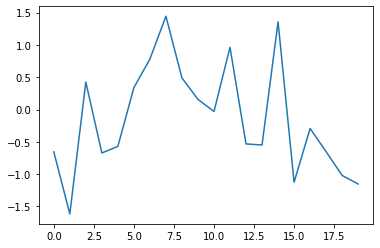

In [ ]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y)
plt.show()

## (2) 정규분포 히스토그램 그리기

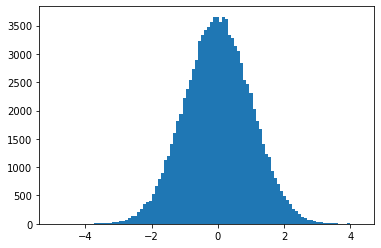

In [ ]:
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000], 0, 1)
plt.hist(random_normal, bins = 100)
plt.show()

## V. 2-레이어 XOR 네트워크의 정보 시각화

딥러닝을 학습시킬 때 가장 많이 보게 되는 그래프는 바로 학습이 잘 되고 있는지 확인하기 위한 측정치(`metric`)변화량을 나타내는 선 그래프입니다. 여기서는 선 그래프를 이용해서 손실이 어떻게 변했는지를 알아보겠습니다. 

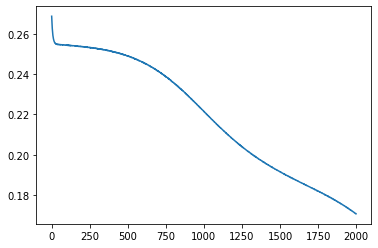

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

그래프를 통해 처음에는 손실이 서서히 감소하다가 어느 시점부터 급격히 감소하고, 나중에는 거의 감소하지 않는 뒤집힌 S자 곡선을 그리는 모습을 확인할 수 있습니다. 이렇게 손실을 시각화하면 네트워크의 학습 현황을 한눈에 파악할 수 있습니다. 



## VII. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch3_3_5_Network_XOR.ipynb) 

## VIII. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.